In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.svm import SVC
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import classification_report

# ANALISI DEI TRAINING SET 
Prima di costruire i modelli per poterli comparare, ci occupiamo dell'analisi dei training set. 
Per fare ciò, iniziamo creando una funzione extract_dataset che mi estrae i dati dividendoli già in features e labels e la applico a tutti e tre i monk's problem trainset. 

In [2]:
def extract_dataset(dataset_path):
    features, labels = [], []
    
    for line in open(dataset_path):
        line = line.split()
        features.append([int(el) for el in line[1:7]])
        labels.append(int(line[0]))
        
    return features, labels

features_1, labels_1 = extract_dataset("monk+s+problems\\monks-1.train")
features_2, labels_2 = extract_dataset("monk+s+problems\\monks-2.train")
features_3, labels_3 = extract_dataset("monk+s+problems\\monks-3.train")

La prima cosa che vogliamo sapere, è in che modo si distribuiscono i dati in base alla loro etichetta, cioè vogliamo sapere se le classi sono bilanciate o no. 

In [5]:
print(f"MONK'S PROBLEMA 1\n"
      f'Le label "1" sono: {labels_1.count(1)}\n'
      f'Le label "0" sono: {labels_1.count(0)}\n'
      f'-----------------------------------------------------\n')

print(f"MONK'S PROBLEMA 2\n"
      f'Le label "1" sono: {labels_2.count(1)}\n'
      f'Le label "0" sono: {labels_2.count(0)}\n'
      f'-----------------------------------------------------\n')

print(f"MONK'S PROBLEMA 3\n"
      f'Le label "1" sono: {labels_3.count(1)}\n'
      f'Le label "0" sono: {labels_3.count(0)}\n')

MONK'S PROBLEMA 1
Le label "1" sono: 62
Le label "0" sono: 62
-----------------------------------------------------

MONK'S PROBLEMA 2
Le label "1" sono: 64
Le label "0" sono: 105
-----------------------------------------------------

MONK'S PROBLEMA 3
Le label "1" sono: 60
Le label "0" sono: 62


Da questo semplice conteggio, scopriamo che il primo e il terzo training set sono bilanciati (nel primo abbiamo 62 esempi per ciascuna classe, nel terzo c'è un lieve sbilanciamento che possiamo ignorare). Il secondo training set, invece, è sbilanciato: la classe "1" ha 64 esempi, mentre la classe "0" ne ha 105. Questo è un dettaglio che dovremo tenere in considerazione nel costruire i modelli con questo training set.  

A questo punto, vogliamo vedere, per ciascuno dei training set, come si distribuiscono i punti nell'iperspazio delle feature. Per farlo, riduciamo il tutto a due dimensioni e vediamo cosa succede.

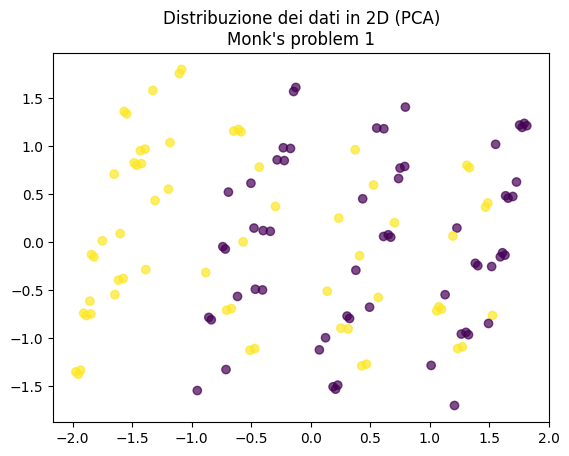

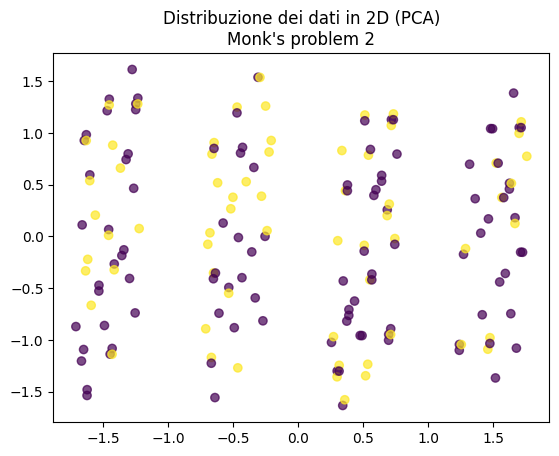

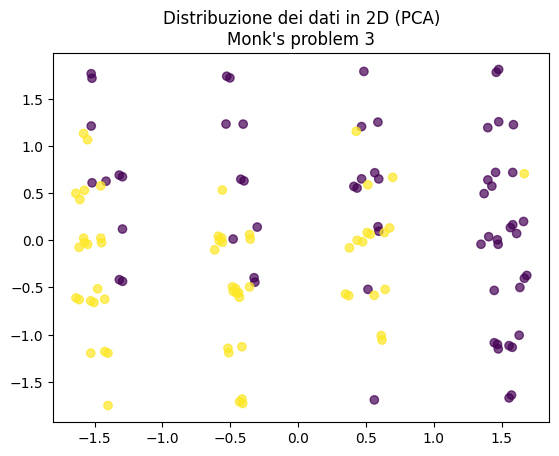

In [4]:
pca = PCA(n_components=2)

#Monk's problem 1
pca_1 = pca.fit_transform(features_1)
plt.scatter(pca_1[:, 0], pca_1[:, 1], c=labels_1, cmap='viridis', alpha=0.7)
plt.title("Distribuzione dei dati in 2D (PCA)\n"
          "Monk's problem 1")
plt.show()

#Monk's problem 2
pca_2 = pca.fit_transform(features_2)
plt.scatter(pca_2[:, 0], pca_2[:, 1], c=labels_2, cmap='viridis', alpha=0.7)
plt.title("Distribuzione dei dati in 2D (PCA)\n"
          "Monk's problem 2")
plt.show()

#Monk's problem 3
pca_3 = pca.fit_transform(features_3)
plt.scatter(pca_3[:, 0], pca_3[:, 1], c=labels_3, cmap='viridis', alpha=0.7)
plt.title("Distribuzione dei dati in 2D (PCA)\n"
          "Monk's problem 3")
plt.show()

Come si vede dai grafici sopra, in nessuno dei tre training set i punti sono separabili linearmente.